In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("bigdata_train.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## Knowledge About columns:
---------------------------
    
    1. Item_Indentifier: unique id number assigned to product
    2. Item_Weight: Weight of Product
    3. Item_Fat_content: Fat content inside product
    4. Item_Visibility: Item visiblity to customer
    5. Item_type: Food Category
    6. Item_MRP: Price of the item
    7. Outlet_Identifier: Outlet identification code
    8. Outlet_Establishment_Year: Year_of_Establishment
    9. Outlet_size: Big Outlet, Small Outlet or Medium Outlet
    10. Outlet_Location_Type: 3 division 1,2,3
    11. Outlet_Type: Supermarket Type2,type1 and type3
    12. Item_Outlet_Sales: Sales result

### File Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Observatin Shows:
 
1. Nominal Data
Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type'

2. Numerical Data
'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Establishment_Year'

3. Memory Usage

799KB 

# Checking Null Values

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

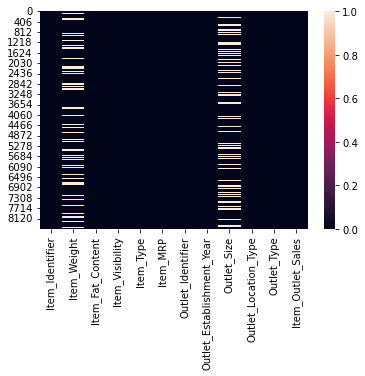

In [8]:
sns.heatmap(df.isnull())

### Observation
1. 1463 values are missing in Item_Weight
2. 2410 values are missing in Outlet_size

### Data Missing Percentage

In [9]:
Missing_Outlets=df['Outlet_Size'].isnull().sum()
Total_Outlets=len(df['Outlet_Size'])

In [10]:
Missing_Weights=df['Item_Weight'].isnull().sum()
Total_Weights  =len(df['Item_Weight'])

In [11]:
print("Outlet Missing Percentage ",(Missing_Outlets/Total_Outlets)*100)

Outlet Missing Percentage  28.27642848762173


In [12]:
print("Weights Missing Percentage ",(Missing_Weights/Total_Weights)*100)

Weights Missing Percentage  17.165317376510618


## Imputing Null Values

In [13]:
df['Item_Weight'].fillna(value=df['Item_Weight'].mean(), inplace=True)

df['Outlet_Size'] 

#column is a object column can't be replaced by mean, median or mode 

In [14]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df['Outlet_Size'].isnull().sum()

2410

Procceding droping the column as if we use mode the value of Medium values will go up

In [17]:
df.drop(['Outlet_Size'],axis=1,inplace=True)

# Checking Unique Values

In [18]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [19]:
df['Item_Identifier'].is_unique

False

In [20]:
df['Item_Identifier'].duplicated().value_counts()

True     6964
False    1559
Name: Item_Identifier, dtype: int64

### Item_Identifier columns with  duplicate values Entry

In [21]:
#droping column
df.drop(['Item_Identifier'],axis=1,inplace=True)

In [22]:
df['Item_Weight'].is_unique

False

In [23]:
df['Item_Weight'].duplicated().value_counts()

True     8107
False     416
Name: Item_Weight, dtype: int64

In [24]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
df ['Item_Fat_Content'] = df ['Item_Fat_Content'].replace ( ['LF'],'Low Fat')

In [26]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat'],'Low Fat')

In [27]:
df['Item_Fat_Content'] =df["Item_Fat_Content"].replace(['reg'],'Regular')

In [28]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
df['Item_Visibility'].unique().sum()

553.874583758

In [30]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [31]:
df['Item_MRP'].unique()

array([249.8092,  48.2692, 141.618 , ...,  57.5904, 214.5218,  75.467 ])

In [32]:
df['Item_MRP'].is_unique

False

In [33]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [34]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [35]:
df['Item_Outlet_Sales'].is_unique

False

## Checking Duplicate Values

In [36]:
print(f'The Data Set data has {df.duplicated().sum()} duplicated ')

The Data Set data has 0 duplicated 


In [37]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

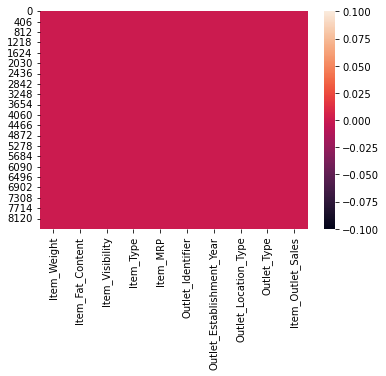

In [38]:
sns.heatmap(df.isnull())

# EDA (Exploratory Data Analysis)

### Univariate Analysis

Minimum Weight 4.555 Maximum Weight 21.35


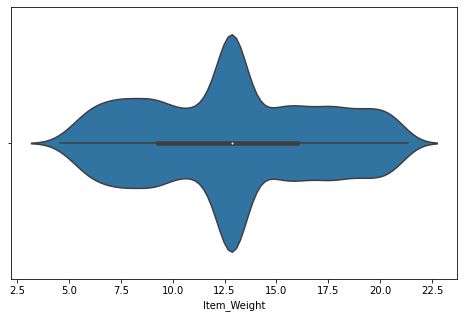

In [39]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Item_Weight',data=df)
print("Minimum Weight",df['Item_Weight'].min(),"Maximum Weight",df['Item_Weight'].max())

Market Having a Maximum Weight of item lies around 12 to 13
Item Having Maximum Weight 21.35 and  Minimum Weight 4.555

<AxesSubplot:xlabel='count', ylabel='Item_Fat_Content'>

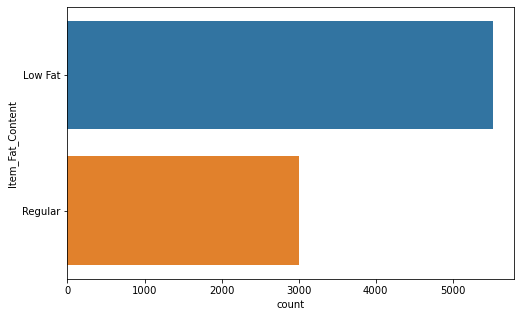

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,y='Item_Fat_Content')

Low Fat items are more then Regular item

<AxesSubplot:xlabel='Item_Visibility'>

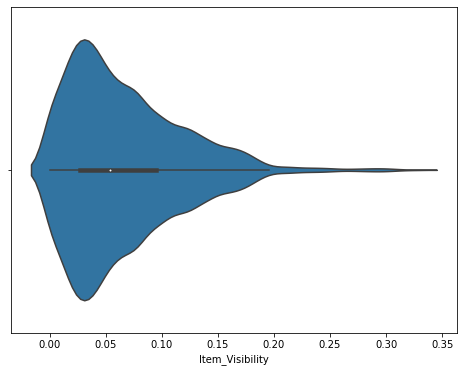

In [41]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,x='Item_Visibility')

Item_Visibility is from zero to 0.15

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

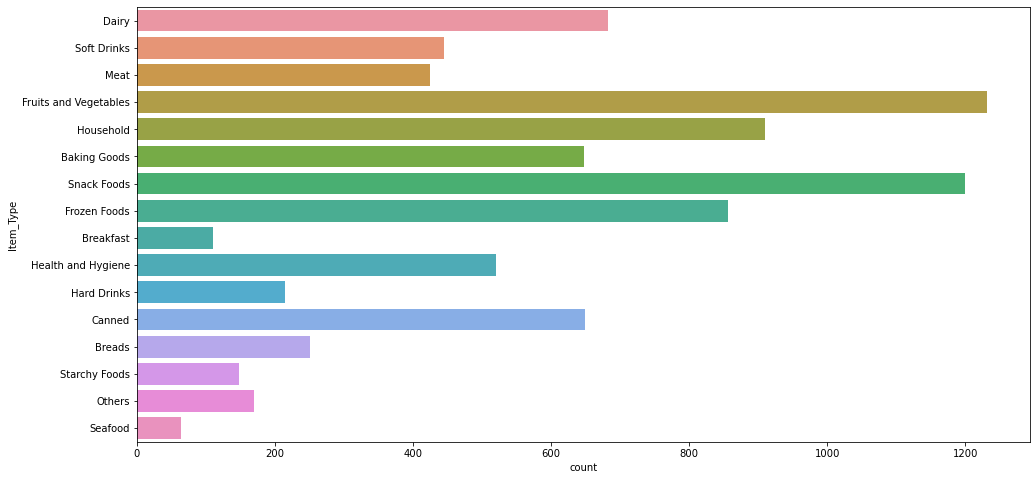

In [42]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,y='Item_Type')

Minimum MRP  31.29 Maximum MRP  266.8884


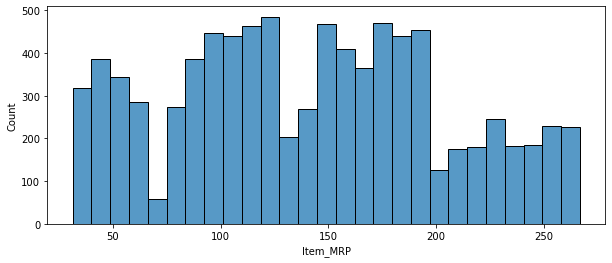

In [43]:
plt.figure(figsize=(10,4))
sns.histplot(x='Item_MRP',data=df)
print("Minimum MRP ",df['Item_MRP'].min(),"Maximum MRP ",df['Item_MRP'].max())

Maximum MRP items lies Between in range of 100 to 200, Items Having Minimum MRP 31.99 Maximum MRP  266.5884

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

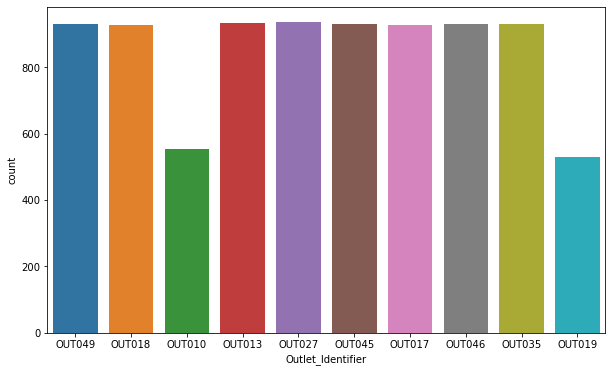

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Identifier',data=df)

Count of OUT010 and OUt019 is less then:
Check the count of outlets

1.  OUT027    624
2.  OUT013    621
3.  OUT049    620
4.  OUT046    620
5.  OUT035    620
6.  OUT045    619
7.  OUT018    618
8.  OUT017    617
9.  OUT010    370
10. OUT019    352

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

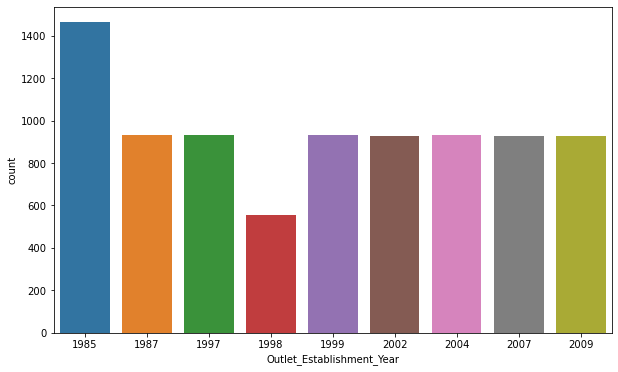

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
df['Outlet_Establishment_Year'].value_counts()

At 1985 Outlet establishment is more then the other years, 1998 shows the lowest.
Outlets counts based on year:

1. 1985    >976
2. 1987    >621
3. 1999    >620
4. 1997    >620
5. 2004    >620
6. 2002    >619
7. 2009    >618
8. 2007    >617
9. 1998    >370

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

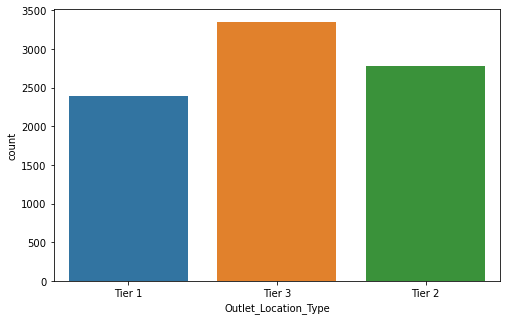

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=df)
df['Outlet_Location_Type'].value_counts()

Total Setup as per Tier:

    Tier 3    2233
    Tier 2    1856
    Tier 1    1592

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

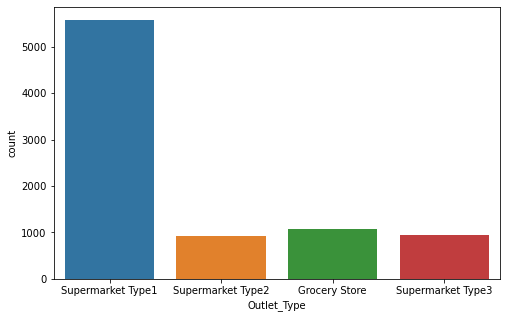

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=df)
df['Outlet_Type'].value_counts()

Count of Supermarket Type 1 is more than Grocery Store and Supermarket Type2,Type3 
1. Supermarket Type1    5577
2. Grocery Store        1083
3. Supermarket Type3     935
4. Supermarket Type2     928

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

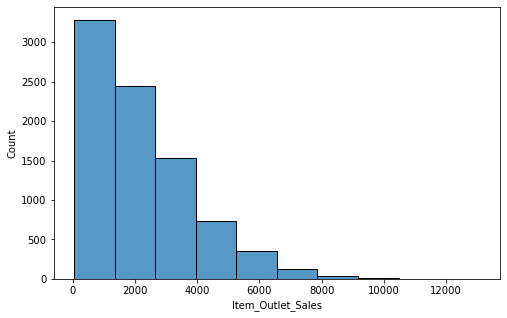

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(x='Item_Outlet_Sales',data=df,bins=10)

Maximum Item_Outlet_Sales are more approx 0 to 1800 followed by 1800 to 2400

# Bivariate Analysis

<Figure size 576x432 with 0 Axes>

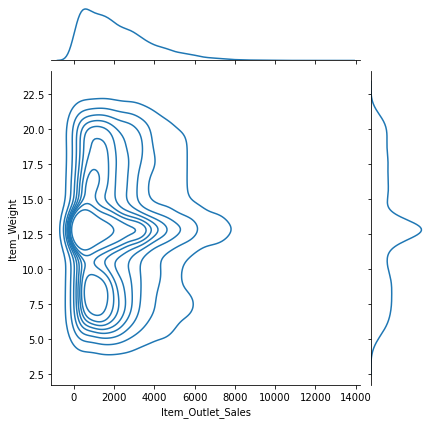

In [49]:
plt.figure(figsize=(8,6))
sns.jointplot(y="Item_Weight",x='Item_Outlet_Sales',data=df,kind='kde')

sale of Products between product 10 to 15kgs are high 

<Figure size 576x432 with 0 Axes>

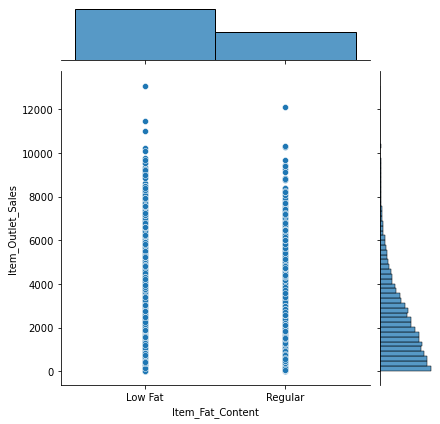

In [50]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df,kind='scatter')

Demand of Low Fat are more than regular 

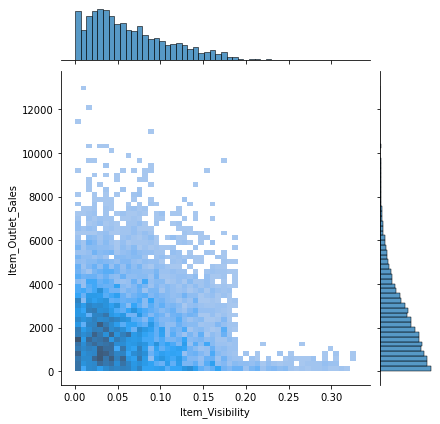

In [51]:
sns.jointplot(x='Item_Visibility',y="Item_Outlet_Sales",data=df,kind='hist')

Item_Visibility is more than sale is also more

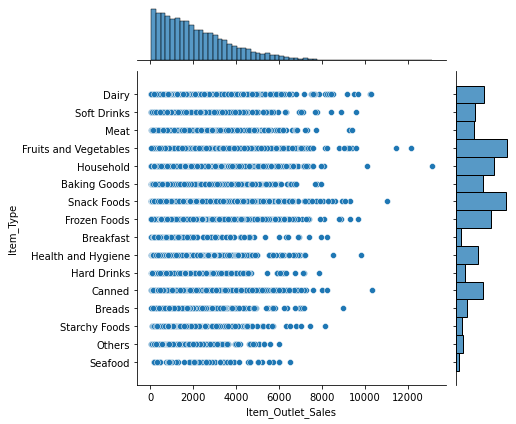

In [52]:
sns.jointplot(y='Item_Type',x='Item_Outlet_Sales',data=df)

Daily Basis Items sales are more than other brands

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

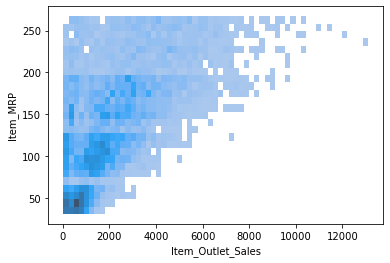

In [53]:
sns.histplot(x='Item_Outlet_Sales',y='Item_MRP',data=df)

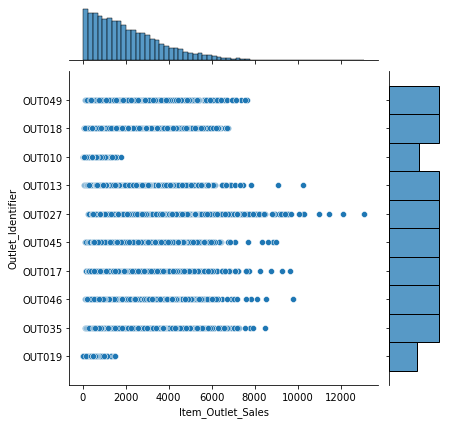

In [54]:
sns.jointplot(x='Item_Outlet_Sales',y='Outlet_Identifier',data=df)

OUT027 outlet is more than others

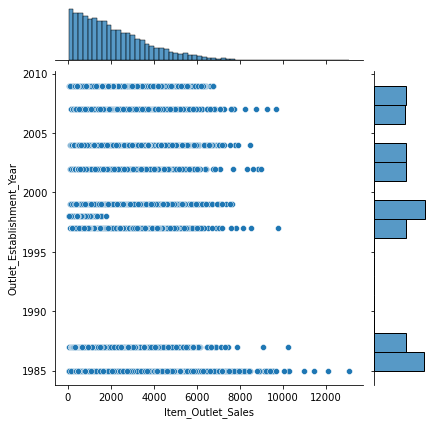

In [55]:
sns.jointplot(x='Item_Outlet_Sales',y='Outlet_Establishment_Year',data=df)

1985 Outlet_Establishment Sale is more 

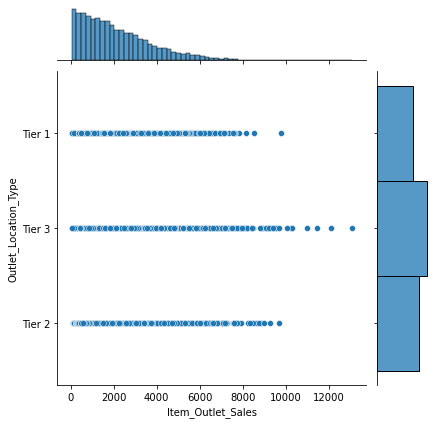

In [56]:
sns.jointplot(x='Item_Outlet_Sales',y='Outlet_Location_Type',data=df)

Tier 3 sales are more than Tier 2 followed by tier 1

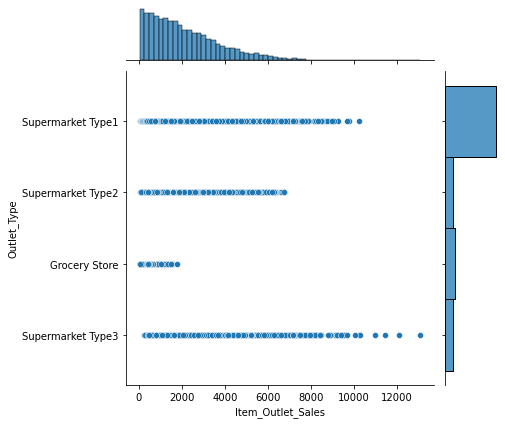

In [57]:
sns.jointplot(x='Item_Outlet_Sales',y='Outlet_Type',data=df)

Supermarket Type3 sales are more than other other Outlet

<Figure size 720x576 with 0 Axes>

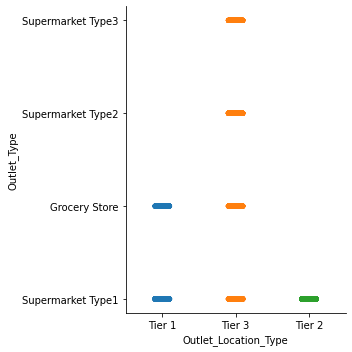

In [58]:
plt.figure(figsize=(10,8))
sns.catplot(x='Outlet_Location_Type',y='Outlet_Type',data=df )

# Multivariate

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

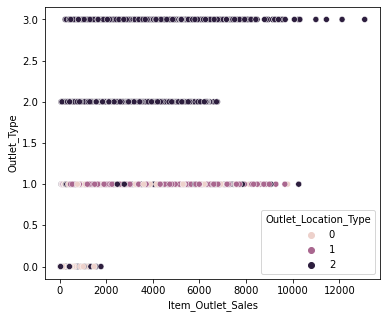

In [151]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Item_Outlet_Sales',y='Outlet_Type',hue='Outlet_Location_Type',data=df)

<Figure size 720x576 with 0 Axes>

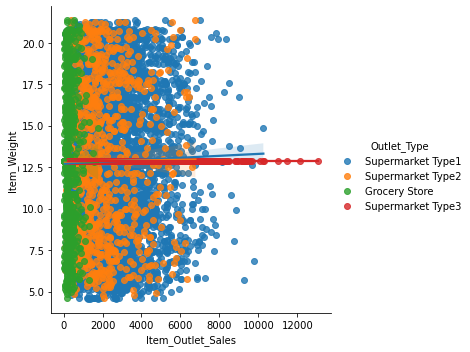

In [60]:
sns.lmplot(y='Item_Weight',x='Item_Outlet_Sales',hue='Outlet_Type',data=df)

<Figure size 720x576 with 0 Axes>

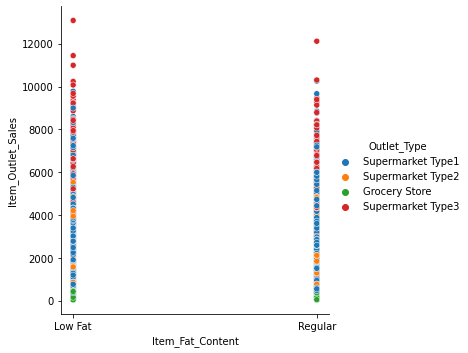

In [61]:
plt.figure(figsize=(10,8))
sns.relplot(x='Item_Fat_Content',y='Item_Outlet_Sales',hue='Outlet_Type',data=df)

<Figure size 720x576 with 0 Axes>

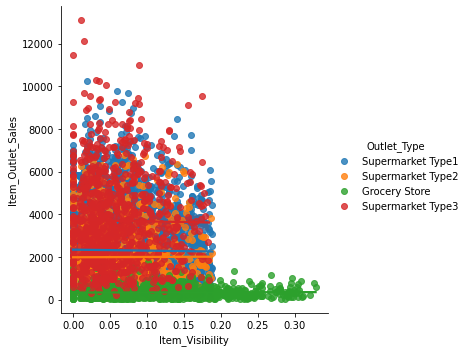

In [62]:
plt.figure(figsize=(10,8))
sns.lmplot(x= 'Item_Visibility',y='Item_Outlet_Sales',hue='Outlet_Type',data=df)

<Figure size 720x576 with 0 Axes>

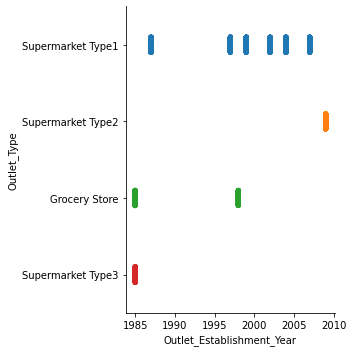

In [63]:
plt.figure(figsize=(10,8))
sns.catplot(x='Outlet_Establishment_Year',y='Outlet_Type',data=df)

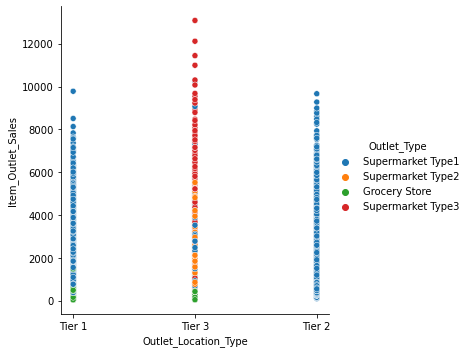

In [64]:
sns.relplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=df)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

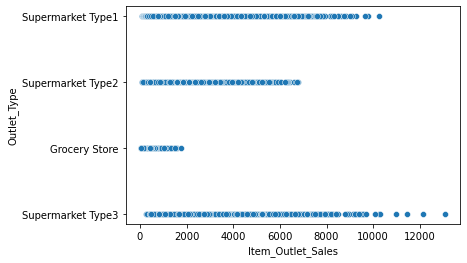

In [65]:
sns.scatterplot(y='Outlet_Type',x='Item_Outlet_Sales',data=df)

# PairPlot

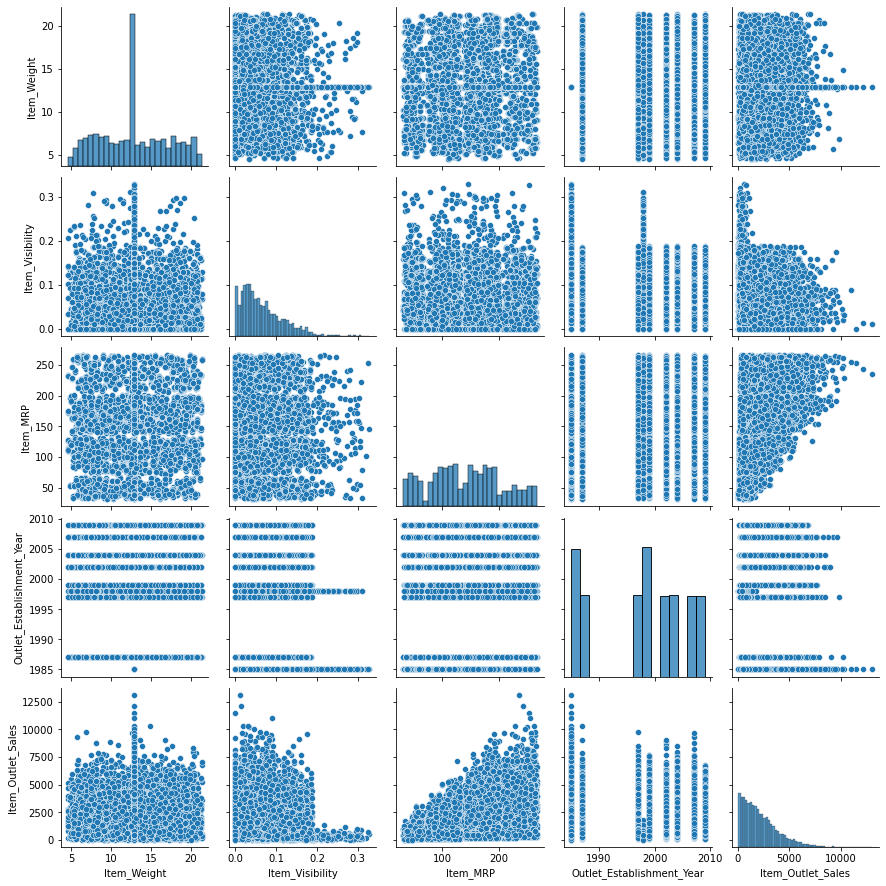

In [66]:
sns.pairplot(data=df)

# Label Encoder

In [67]:
var = ['Item_Type','Outlet_Identifier','Outlet_Type','Item_Fat_Content','Outlet_Location_Type']

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [69]:
for x in var:
    df[x]=le.fit_transform(df[x])

In [70]:
df.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7869,7.285,0,0.031279,9,176.0054,3,2009,2,2,2626.5810
25,13.000,0,0.099887,9,45.9060,2,2007,1,1,838.9080
4470,12.100,0,0.025834,9,165.1526,0,1998,2,0,164.4526
951,19.350,0,0.016598,5,121.5098,1,1987,2,1,2892.2352
5200,10.300,0,0.146999,10,103.7648,2,2007,1,1,2804.3496


# Descriptive Statistics

In [71]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,3.000000,13086.964800


### Observations

1. Null Values  = No Null Values
2. Right Skewed = Item_Fat_Content, Item_Visibility, Outlet_Establishment_Year, Item_Outlet_Sales, Item_Type, Outlet_Type
3. Left Skewed  = Item_MRP, Item_identifier, Outlet_Establishment_Year, Outlet_Location_Type
4. Standard Deviation = Item_MRP,Item_Outlet_Sales,Item_Identifier
5. Outliers = Item_Outlet_Sales

Note: Item_Outlet_Sales is a target Variable

Text(0.5, 1.0, 'Descriptive Graph')

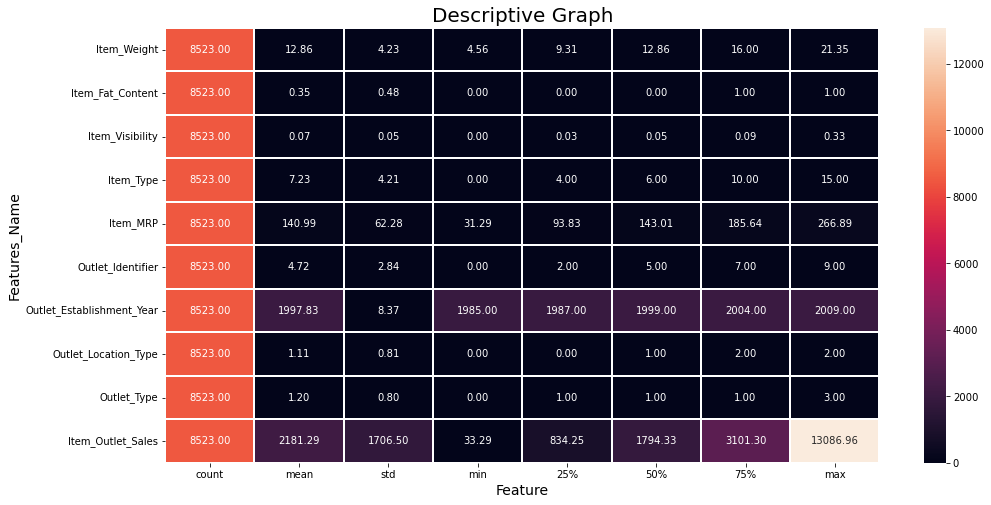

In [72]:
plt.figure(figsize=(16,8))
sns.heatmap(round(df.describe()[:].transpose(),2),square=False,annot=True,linewidth=0.2,linecolor='white',fmt='0.2f')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Features_Name",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)

# Correlation

In [73]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,-0.089216,-0.122304,-0.049135
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.122304,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.017048,0.567574,0.162325,-0.049135,0.089367,0.401522,1.000000


Text(0.5, 1.0, 'Correlation Graph')

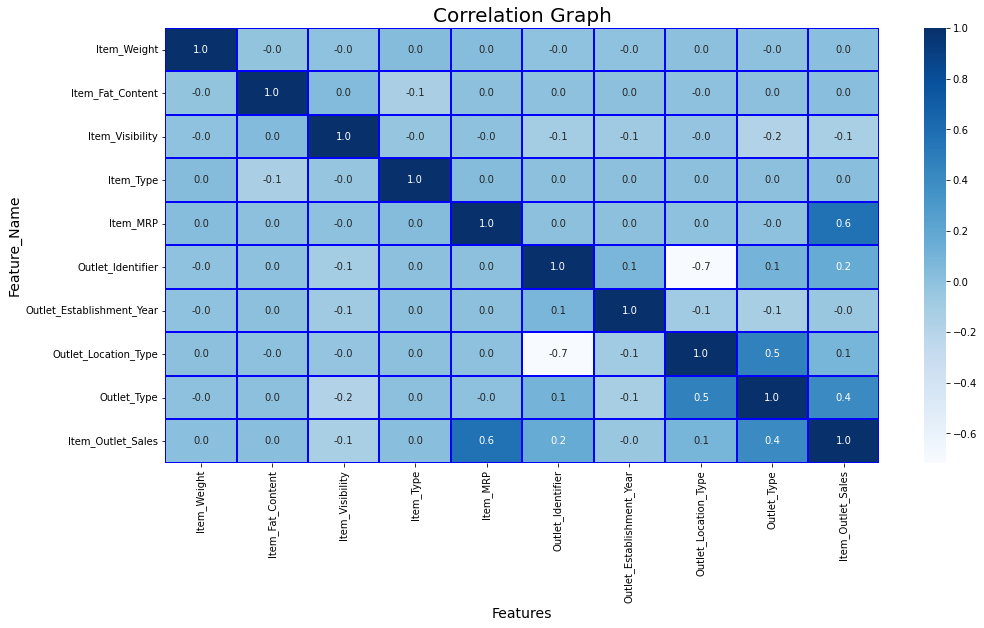

In [74]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,square=False,linewidth=0.03,linecolor='blue',fmt='0.1f',cmap='Blues')
plt.xlabel("Features",fontsize=14)
plt.ylabel("Feature_Name",fontsize=14)
plt.title("Correlation Graph",fontsize=20)

## Observation:

1. Item_Weight has Zero relation with sales
2. Item_Fat_content has No relation with Target Variable.
3. Item_Visibility has 10 percentage negative relation with Target Variable.
4. Item_Type has zero relation with Target Variable
5. Item_MRP is 60 percent correlated with Target Variable which is a very strong bond
6. Outlet_identifier has 20 percent correlation with Target Variable which is a good bond
7. Outlet_establishment has light negative correlation with target variable
8. Outlet_location_type is 10 percentage correlated with target variable
9. Outlet_Type has 40 percent poitive correlation with the target variable.

Max= Item_MRP

Text(0.5, 1.0, 'CORRELATION')

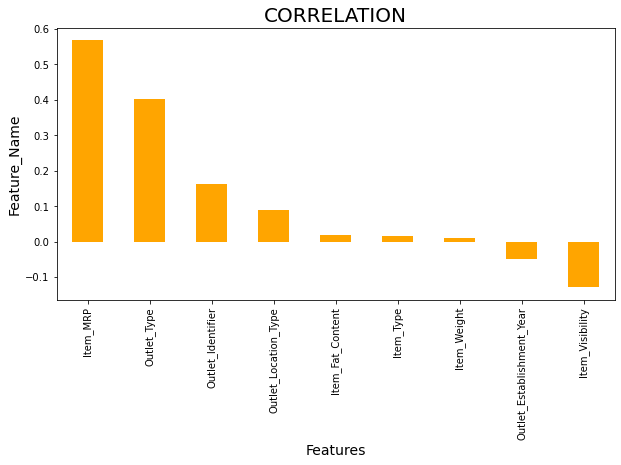

In [75]:
plt.figure(figsize=(10,5))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='orange')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Feature_Name',fontsize=14)
plt.title('CORRELATION',fontsize=20)

# Outliers

<AxesSubplot:xlabel='Item_Weight'>

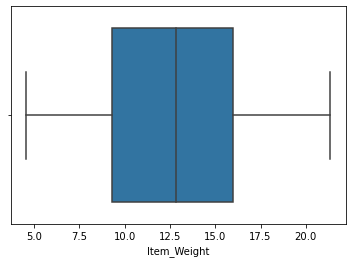

In [76]:
sns.boxplot(x='Item_Weight',data=df)

NO outliers

<AxesSubplot:>

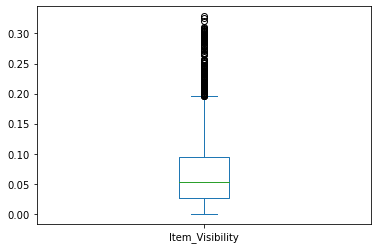

In [77]:
df['Item_Visibility'].plot.box()

Huge Outlier is present in the column

<AxesSubplot:xlabel='Item_Type'>

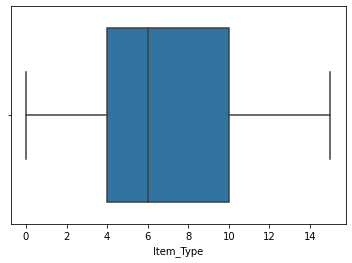

In [78]:
sns.boxplot(x='Item_Type',data=df)

No outlier

<AxesSubplot:xlabel='Item_MRP'>

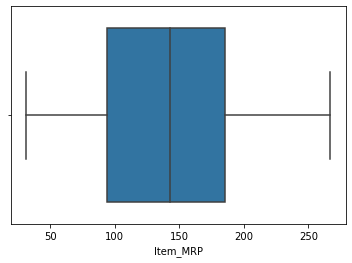

In [79]:
sns.boxplot(x='Item_MRP',data=df)

No outlier is present

<AxesSubplot:xlabel='Outlet_Identifier'>

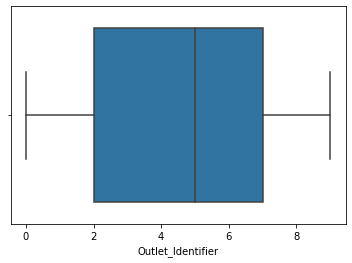

In [80]:
sns.boxplot(x='Outlet_Identifier',data=df)

No outlier is present

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

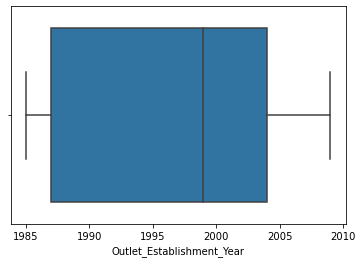

In [81]:
sns.boxplot(data=df,x='Outlet_Establishment_Year')

No outliers is present

<AxesSubplot:xlabel='Outlet_Type'>

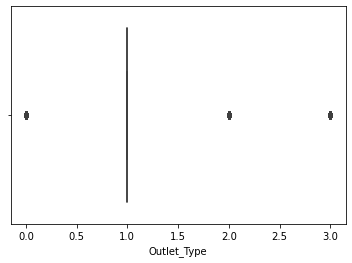

In [82]:
sns.boxplot(x='Outlet_Type',data=df)

Few Outliers category Variable

# Skewness

In [83]:
df.skew().sort_values()

Outlet_Establishment_Year   -0.396641
Outlet_Location_Type        -0.209093
Outlet_Identifier           -0.059861
Item_Weight                  0.090561
Item_Type                    0.101655
Item_MRP                     0.127202
Item_Fat_Content             0.616705
Outlet_Type                  0.927438
Item_Visibility              1.167091
Item_Outlet_Sales            1.177531
dtype: float64

Outcome shows: Skewness Threshold is taken is(+/-65).
`Column showing skewness are..

- Outlet_Type
- Item_Visibility
- Item_Outlet_Sales  

#target variable--> Item_Outlet_Sales 

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

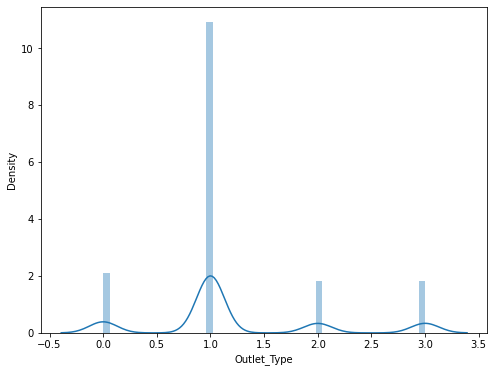

In [84]:
plt.figure(figsize=(8,6))
sns.distplot(df['Outlet_Type'])

The data in the given graph shows is not Normalised.The building blocks are beyond the normal curve. its mulimodal Graph(more than 3 modes)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

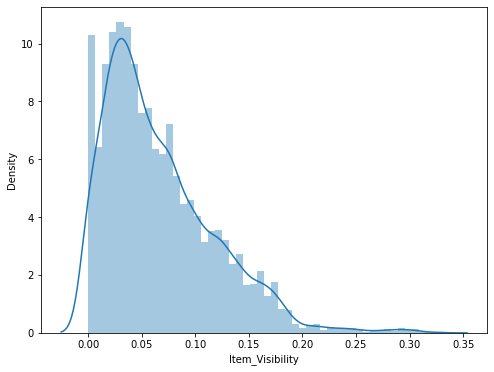

In [85]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Visibility'])

The data in the given graph shows is not Normalised.The building blocks are beyond the normal curve.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

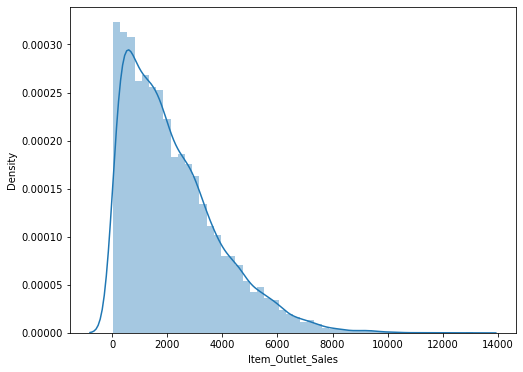

In [86]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Outlet_Sales'])

The data in the given graph shows is not Normalised.The building blocks are beyond the normal curve.

# Data Cleansing

### Correlation:

In [87]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.011550
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [88]:
Delete=pd.DataFrame({'Column Name':['Item_Visibility','Outlet_Establishment_Year','Item_Weight','Item_Type','Item_Fat_Content',],
       'Values':['-0.128625','-0.049135','0.011550','0.017048','0.018719'],
       'Outliers':['No','Yes','Yes','No','yes'],
       'Normalised':['No','Yes','yes','No','No']})

In [89]:
Delete

,Column Name,Values,Outliers,Normalised
0,Item_Visibility,-0.128625,No,No
1,Outlet_Establishment_Year,-0.049135,Yes,Yes
2,Item_Weight,0.011550,Yes,yes
3,Item_Type,0.017048,No,No
4,Item_Fat_Content,0.018719,yes,No


In [90]:
df.drop(['Item_Visibility','Outlet_Establishment_Year','Item_Weight','Item_Type','Item_Fat_Content'],axis=1,inplace=True)

### Outliers

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.747454,1.507813,1.369334,0.252658,0.910601
1,1.489023,0.607071,1.091569,1.002972,1.018440
2,0.010040,1.507813,1.369334,0.252658,0.049238
3,0.660050,1.664513,1.091569,1.508289,0.849103
4,1.399220,1.312032,1.091569,0.252658,0.695373
...,...,...,...,...,...
8518,1.180783,1.312032,1.091569,0.252658,0.349915
8519,0.527301,0.802852,0.138882,0.252658,0.956402
8520,0.897208,0.450371,0.138882,0.252658,0.579100
8521,0.607977,0.607071,1.091569,1.002972,0.196725


In [92]:
threshold=3
np.where(z>3)

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
         809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
        2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
        3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
        4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
        5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
        6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
        7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
        8245, 8447], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4], dtype=int64))

In [93]:
z.iloc[130,4]

3.3913544171949606

In [94]:
new_df=df[(z<3).all(axis=1)]

In [95]:
new_df

,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,249.8092,9,0,1,3735.1380
1,48.2692,3,2,2,443.4228
2,141.6180,9,0,1,2097.2700
3,182.0950,0,2,0,732.3800
4,53.8614,1,2,1,994.7052
...,...,...,...,...,...
8518,214.5218,1,2,1,2778.3834
8519,108.1570,7,1,1,549.2850
8520,85.1224,6,1,1,1193.1136
8521,103.1332,3,2,2,1845.5976


# Percentage of Data Loss

### Data Frame Size Count    

In [96]:
print("Old Data Frame ",    df.shape)
print("New Data Frame ",new_df.shape)

Old Data Frame  (8523, 5)
New Data Frame  (8433, 5)


### Percentage of Data Loss

In [97]:
print("Percentage of Data Loss ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100 )

Percentage of Data Loss  1.0559662090813093


In [98]:
new_df

,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,249.8092,9,0,1,3735.1380
1,48.2692,3,2,2,443.4228
2,141.6180,9,0,1,2097.2700
3,182.0950,0,2,0,732.3800
4,53.8614,1,2,1,994.7052
...,...,...,...,...,...
8518,214.5218,1,2,1,2778.3834
8519,108.1570,7,1,1,549.2850
8520,85.1224,6,1,1,1193.1136
8521,103.1332,3,2,2,1845.5976


In [99]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [100]:
x

,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,249.8092,9,0,1
1,48.2692,3,2,2
2,141.6180,9,0,1
3,182.0950,0,2,0
4,53.8614,1,2,1
...,...,...,...,...
8518,214.5218,1,2,1
8519,108.1570,7,1,1
8520,85.1224,6,1,1
8521,103.1332,3,2,2


In [101]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [102]:
print("X Shape",x.shape,"Y Shape ",y.shape)

X Shape (8523, 4) Y Shape  (8523,)


# Checking Mulicolinarity:

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):# here x is the x train data
    vif=pd.DataFrame()
    vif['Variable']=x.columns #x columns
    vif['Vif Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])] #data from x column
    return vif
    

In [104]:
calc_vif(x)

,Variable,Vif Factors
0,Item_MRP,5.036821
1,Outlet_Identifier,4.951421
2,Outlet_Location_Type,5.703122
3,Outlet_Type,6.651684


#All the VIF Factor 

# Remove Skewness

In [105]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [106]:
x.mean()

1.5631439980642824e-18

In [107]:
x.std()

1.0

# Standardization

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [109]:
print("Mean ",round(x.mean()))
print("Standard Deviation ",round(x.std()))

Mean  0
Standard Deviation  1


### Target Variable

In [110]:
y.unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

## As the target variable is in continious variable so we will follow the linear model

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr=LinearRegression()

In [112]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train),2)==round(r2_score(y_test,pred_test),2):
        print(f"At random State {i},The r2 train score {r2_score(y_train,pred_train)}, r2 test score {r2_score(y_test,pred_test)}")

At random State 1,The r2 train score 0.5152923689130852, r2 test score 0.5166798768323114
At random State 14,The r2 train score 0.5153953806488665, r2 test score 0.5168227926993807
At random State 16,The r2 train score 0.5153773750549726, r2 test score 0.5159071188032007
At random State 67,The r2 train score 0.515426335750246, r2 test score 0.5164605174862715
At random State 81,The r2 train score 0.5156906258771021, r2 test score 0.5156378977755215
At random State 93,The r2 train score 0.5156830660861835, r2 test score 0.5151339342866094


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.2)
lr.fit(x_train,y_train)#train

#predict
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

print("Training R2 Score ", r2_score(y_train,pred_train)*100,"Test R2 Score ",r2_score(y_test,pred_test)*100)

print("Mean Absolute Error ",round(mean_absolute_error(y_train,pred_train),2),"Mean Absolute Error ",round(mean_absolute_error(y_test,pred_test),2))
print("Mean Squared Error ",mean_squared_error(y_train,pred_train),"Mean Squared Test Error ",mean_squared_error(y_test,pred_test))

Training R2 Score  51.31430144033769 Test R2 Score  52.55328636056043
Mean Absolute Error  891.65 Mean Absolute Error  883.38
Mean Squared Error  1415956.7804795296 Mean Squared Test Error  1388029.402074206


# Cross Validation

In [114]:
from sklearn.model_selection import cross_val_score

r2_train=r2_score(y_train,pred_train)#pred train
r2_test=r2_score(y_test,pred_test)#predict test

for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("At CrossFold ",i,"The CV_Score is ",cv_mean,"Training accuracy score is ",r2_train,"Test accuracy", r2_test)
    

At CrossFold  2 The CV_Score is  0.5154028344019422 Training accuracy score is  0.5131430144033768 Test accuracy 0.5255328636056043
At CrossFold  3 The CV_Score is  0.5147068164659546 Training accuracy score is  0.5131430144033768 Test accuracy 0.5255328636056043
At CrossFold  4 The CV_Score is  0.5142124344944237 Training accuracy score is  0.5131430144033768 Test accuracy 0.5255328636056043
At CrossFold  5 The CV_Score is  0.5146428197032482 Training accuracy score is  0.5131430144033768 Test accuracy 0.5255328636056043
At CrossFold  6 The CV_Score is  0.5144435236336137 Training accuracy score is  0.5131430144033768 Test accuracy 0.5255328636056043
At CrossFold  7 The CV_Score is  0.5148896777278137 Training accuracy score is  0.5131430144033768 Test accuracy 0.5255328636056043
At CrossFold  8 The CV_Score is  0.5146820609295492 Training accuracy score is  0.5131430144033768 Test accuracy 0.5255328636056043
At CrossFold  9 The CV_Score is  0.5147171326574369 Training accuracy score 

In [115]:
lr_score_selected=cross_val_score(lr,x,y,cv=2).mean() # mean value

pred_lr= lr.predict(x_test)# predict linear regression

lss=r2_score(y_test,pred_lr) #saved value for 
lss

0.5255328636056043

In [116]:
print("The cv score is: ",lr_score_selected,"\nThe Accuracy score is: ",lss)

The cv score is:  0.5154028344019422 
The Accuracy score is:  0.5255328636056043


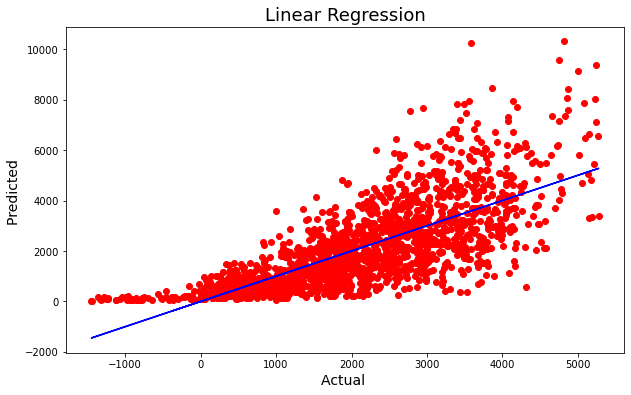

In [117]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')

plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Since the number of folds doesn't have such impact on the accuracy and cv_score.  But on a safe side we will go with cv=2
Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'selection':['cyclic', 'random']}
ls=Lasso()
gsv=GridSearchCV(ls,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'alpha': 1, 'selection': 'random'}
0.5103804580146379


In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'solver':['auto','svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
rd=Ridge()
gsv=GridSearchCV(rd,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'alpha': 0.1, 'solver': 'sag'}
0.5103943840178701


In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'selection':['cyclic', 'random']}
en=ElasticNet()
gsv=GridSearchCV(en,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'alpha': 0.01, 'selection': 'random'}
0.5103725603140082


In [121]:
lr.coef_

array([ 966.35718904,   19.95688475, -167.42124371,  800.840842  ])

In [122]:
# Lasso works better so using the same model..
ls=Lasso(alpha=0.1,selection='random')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5131430024684267

In [123]:
lr.coef_

array([ 966.35718904,   19.95688475, -167.42124371,  800.840842  ])

# Model_Selection

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
sgd=SGDRegressor()

model=[dtr,knr,svr,sgd]


for m in model:
    m.fit(x_train,y_train)
    m_score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test =m.predict(x_test)
    
    print("Training ",m," ",m_score)
    print("R2 Training Accuracy ",r2_score(y_train,pred_train),"R2 Testing Accuracy ",r2_score(y_test,pred_test))
    print("Training Mean Squared Error ",mean_squared_error(y_train,pred_train),"Test Mean Squared Error ",mean_squared_error(y_test,pred_test))
    print("Training mean Absolute Error ",mean_absolute_error(y_train,pred_train),"Testing Mean ABSOLUTE Error ",mean_absolute_error(y_test,pred_test),"\n\n")
    

Training  DecisionTreeRegressor()   0.9911888497419576
R2 Training Accuracy  0.9911888497419576 R2 Testing Accuracy  0.17660588841800895
Training Mean Squared Error  25626.022262800427 Test Mean Squared Error  2408797.4671032927
Training mean Absolute Error  26.310265023956198 Testing Mean ABSOLUTE Error  1070.1294060410555 


Training  KNeighborsRegressor()   0.6726339434058346
R2 Training Accuracy  0.6726339434058346 R2 Testing Accuracy  0.5527801414685173
Training Mean Squared Error  952099.2842801864 Test Mean Squared Error  1308318.8807352283
Training mean Absolute Error  677.6843639894398 Testing Mean ABSOLUTE Error  804.130278686217 


Training  SVR()   0.16576800494409694
R2 Training Accuracy  0.16576800494409694 R2 Testing Accuracy  0.1659883275705838
Training Mean Squared Error  2426249.360363629 Test Mean Squared Error  2439858.5996962306
Training mean Absolute Error  1117.8522571850135 Testing Mean ABSOLUTE Error  1120.7734454137476 


Training  SGDRegressor()   0.512615223

# KNeighbour Regressor

### Hyperparameter Tuning for KNeighbour Regressor

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

parameter={"n_neighbors":[5,6,7,8,9,10],
          "weights":['uniform','distance'],
          "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
          "n_jobs":[1]}

gsv=GridSearchCV(knr,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Params ",gsv.best_params_)

Best Score  0.5535434457825542 Best Params  {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 10, 'weights': 'uniform'}


In [126]:
knr=KNeighborsRegressor(algorithm ='auto', n_jobs= 1, n_neighbors= 10, weights='uniform')
knr.fit(x_train,y_train)
knr_score=knr.score(x_train,y_train)

pred_train=knr.predict(x_train)
pred_test=knr.predict(x_test)

print("Training score = ",knr_score)
print("R2 Training Accuracy ",r2_score(y_train,pred_train),"R2 Testing Accuracy ",r2_score(y_test,pred_test))
print("Training Mean Squared Error ",mean_squared_error(y_train,pred_train),"Test Mean Squared Error ",mean_squared_error(y_test,pred_test))
print("Training mean Absolute Error ",mean_absolute_error(y_train,pred_train),"Testing Mean ABSOLUTE Error ",mean_absolute_error(y_test,pred_test),"\n\n")    

Training score =  0.6365460797555136
R2 Training Accuracy  0.6365460797555136 R2 Testing Accuracy  0.5867740641747434
Training Mean Squared Error  1057055.8870206675 Test Mean Squared Error  1208871.3940944294
Training mean Absolute Error  716.8740277500733 Testing Mean ABSOLUTE Error  768.7485732903226 




In [127]:
from sklearn.model_selection import cross_val_score
knr_train=r2_score(y_train,pred_train)
knr_test=r2_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(knr,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print(f"At CrossFold {i}, Cross Validation Score is {cv_mean},Training accuracy is{knr_train},Testing accuracy is {knr_test}")

At CrossFold 2, Cross Validation Score is 0.5635064912881524,Training accuracy is0.6365460797555136,Testing accuracy is 0.5867740641747434
At CrossFold 3, Cross Validation Score is 0.5573782580733103,Training accuracy is0.6365460797555136,Testing accuracy is 0.5867740641747434
At CrossFold 4, Cross Validation Score is 0.5582942244328056,Training accuracy is0.6365460797555136,Testing accuracy is 0.5867740641747434
At CrossFold 5, Cross Validation Score is 0.5594070949148633,Training accuracy is0.6365460797555136,Testing accuracy is 0.5867740641747434
At CrossFold 6, Cross Validation Score is 0.5621171711559162,Training accuracy is0.6365460797555136,Testing accuracy is 0.5867740641747434
At CrossFold 7, Cross Validation Score is 0.5615767996776065,Training accuracy is0.6365460797555136,Testing accuracy is 0.5867740641747434
At CrossFold 8, Cross Validation Score is 0.5625937571835742,Training accuracy is0.6365460797555136,Testing accuracy is 0.5867740641747434
At CrossFold 9, Cross Valid

At cross fold 2 Machine model accuracy is close to Testing Score, we will select the cross fold 2

In [128]:
cv_score=cross_val_score(knr,x,y,cv=2)
cv_mean=cv_score.mean()

print("Cross fold two the Cross Validation mean score is ",cv_mean," And Testing score",knr_test )

Cross fold two the Cross Validation mean score is  0.5635064912881524  And Testing score 0.5867740641747434


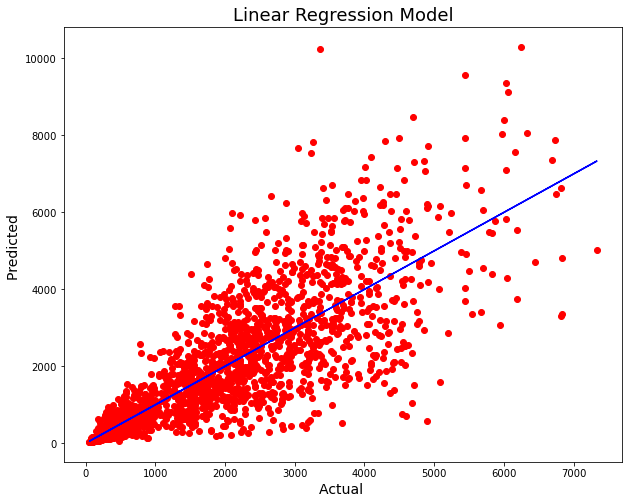

In [129]:
plt.figure(figsize=(10,8))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression Model",fontsize=18)
plt.show()

# Ensemble Technique

In [130]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Model instences
et=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
ada=AdaBoostRegressor()
mlp=MLPRegressor()

model=[et,gbr,rfr,ada,mlp]

for m in model:
    m.fit(x_train,y_train)
    m_score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    print("Training score = ",m, m_score)
    print("R2 Training Accuracy ",r2_score(y_train,pred_train),"R2 Testing Accuracy ",r2_score(y_test,pred_test))
    print("Training Mean Squared Error ",mean_squared_error(y_train,pred_train),"Test Mean Squared Error ",mean_squared_error(y_test,pred_test))
    print("Training mean Absolute Error ",mean_absolute_error(y_train,pred_train),"Testing Mean ABSOLUTE Error ",mean_absolute_error(y_test,pred_test),"\n\n")    
    

Training score =  ExtraTreesRegressor() 0.9911761757880292
R2 Training Accuracy  0.9911761757880292 R2 Testing Accuracy  0.3706184491209751
Training Mean Squared Error  25662.882719837096 Test Mean Squared Error  1841223.6185247158
Training mean Absolute Error  26.55942832081979 Testing Mean ABSOLUTE Error  933.6061762412513 


Training score =  GradientBoostingRegressor() 0.6277011572538482
R2 Training Accuracy  0.6277011572538482 R2 Testing Accuracy  0.6153185333241458
Training Mean Squared Error  1082780.1312228972 Test Mean Squared Error  1125366.0058244262
Training mean Absolute Error  732.0983653778277 Testing Mean ABSOLUTE Error  743.313542764109 


Training score =  RandomForestRegressor() 0.9193305256372176
R2 Training Accuracy  0.9193305256372176 R2 Testing Accuracy  0.482001502241149
Training Mean Squared Error  234616.10407360972 Test Mean Squared Error  1515378.1789470369
Training mean Absolute Error  330.25312067411215 Testing Mean ABSOLUTE Error  850.4251367128595 


Tra

# HyperParameter Tuning : Gradient Boosting Regressor

### Model: Gradient Boosting Regressor

In [131]:
gbr=GradientBoostingRegressor(loss= 'absolute_error',learning_rate=0.1,criterion='friedman_mse' ,max_features='sqrt' ,n_iter_no_change= 16 , random_state=12)
gbr.fit(x_train,y_train)
gbr_score=gbr.score(x_train,y_train)

pred_train=gbr.predict(x_train)
pred_test=gbr.predict(x_test)

print("Training score = ",knr_score)
print("R2 Training Accuracy ",r2_score(y_train,pred_train),"R2 Testing Accuracy ",r2_score(y_test,pred_test))
print("Training Mean Squared Error ",mean_squared_error(y_train,pred_train),"Test Mean Squared Error ",mean_squared_error(y_test,pred_test))
print("Training mean Absolute Error ",mean_absolute_error(y_train,pred_train),"Testing Mean ABSOLUTE Error ",mean_absolute_error(y_test,pred_test),"\n\n")    

Training score =  0.6365460797555136
R2 Training Accuracy  0.6028784988952484 R2 Testing Accuracy  0.6145516444906884
Training Mean Squared Error  1154973.4291568154 Test Mean Squared Error  1127609.499983053
Training mean Absolute Error  742.5377559000208 Testing Mean ABSOLUTE Error  738.8655506770326 




In [132]:
from sklearn.model_selection import cross_val_score
gbr_train=r2_score(y_train,pred_train)
gbr_test=r2_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(knr,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print(f"At CrossFold {i}, Cross Validation Score is {cv_mean},Training accuracy is{gbr_train},Testing accuracy is {gbr_test}")

At CrossFold 2, Cross Validation Score is 0.5635064912881524,Training accuracy is0.6028784988952484,Testing accuracy is 0.6145516444906884
At CrossFold 3, Cross Validation Score is 0.5573782580733103,Training accuracy is0.6028784988952484,Testing accuracy is 0.6145516444906884
At CrossFold 4, Cross Validation Score is 0.5582942244328056,Training accuracy is0.6028784988952484,Testing accuracy is 0.6145516444906884
At CrossFold 5, Cross Validation Score is 0.5594070949148633,Training accuracy is0.6028784988952484,Testing accuracy is 0.6145516444906884
At CrossFold 6, Cross Validation Score is 0.5621171711559162,Training accuracy is0.6028784988952484,Testing accuracy is 0.6145516444906884
At CrossFold 7, Cross Validation Score is 0.5615767996776065,Training accuracy is0.6028784988952484,Testing accuracy is 0.6145516444906884
At CrossFold 8, Cross Validation Score is 0.5625937571835742,Training accuracy is0.6028784988952484,Testing accuracy is 0.6145516444906884
At CrossFold 9, Cross Valid

In [133]:
cv_score=cross_val_score(knr,x,y,cv=2)
cv_mean=cv_score.mean()
print("Cross Validation Score ",cv_mean ,'Testing score',gbr_test)

Cross Validation Score  0.5635064912881524 Testing score 0.6145516444906884


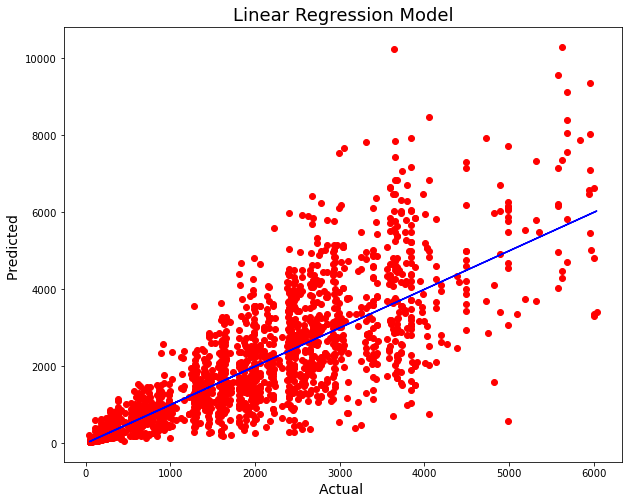

In [134]:
plt.figure(figsize=(10,8))
plt.scatter(x=pred_test,y=y_test,color='r')#tests

plt.plot(pred_test,pred_test,color='b')#pred_test
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression Model",fontsize=18)
plt.show()

# Hyperparameter Random Forest

from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':list(range(100,106)),
           'criterion':['squared_error', 'absolute_error', 'poisson'],
           'max_features':['sqrt','log2']}

rf=RandomForestRegressor()
gs=GridSearchCV(rf,parameters)
gs.fit(x_train,y_train)

print("Best Parameter",gs.best_params_)
print("Best Score",gs.best_score_)

In [135]:
    # TAKING LONG TIME...... GOT THE SAME RESULT

### Model Random Forest Regressor

In [136]:
#Train
rf=RandomForestRegressor(n_estimators= 100,criterion='absolute_error',random_state=12,max_features='log2')
rf.fit(x_train,y_train)

pred_train=rf.predict(x_train) #predict train
pred_test=rf.predict(x_test)# predict Test

#Checking score and Errors
print("Train and Test r2 score",r2_score(y_train,pred_train),", ",r2_score(y_test,pred_test))
print("Train and Test MSE score",mean_squared_error(y_train,pred_train),",",mean_squared_error(y_test,pred_test))
print("Train and test Absolute Error",mean_absolute_error(y_train,pred_train),",",mean_absolute_error(y_test,pred_test))

Train and Test r2 score 0.8975244223483649 ,  0.48196036964318845
Train and Test MSE score 298036.1652438322 , 1515498.510263947
Train and test Absolute Error 375.5528125 , 852.2175762991202


### Cross Validation Score

from sklearn.model_selection import cross_val_score

r2score_train=r2_score(y_train,pred_train)
r2score_test=r2_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print(f"Cross fold {i} the cv_score {cv_mean} and training_score is {r2score_train} and testing_score is {r2score_test}")

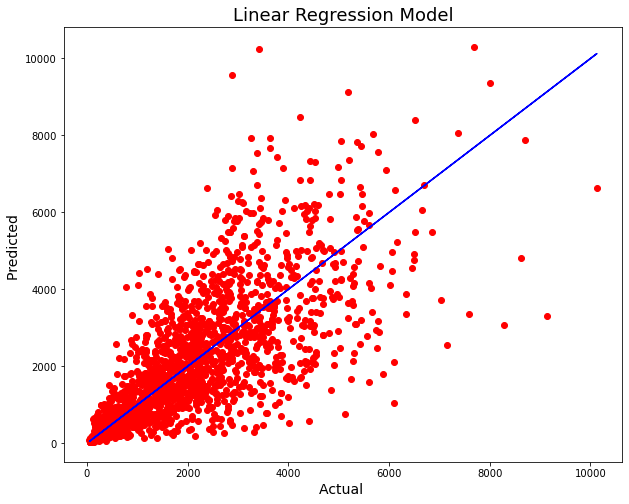

In [137]:
plt.figure(figsize=(10,8))
plt.scatter(x=pred_test,y=y_test,color='r')#tests

plt.plot(pred_test,pred_test,color='b')#pred_test
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression Model",fontsize=18)
plt.show()

In [138]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

parameter={'learning_rate':[1.0,2.0,3.0,4.0,5.0,6.0],
           'loss':['linear', 'square', 'exponential'],
           'n_estimators':list(range(50,70))}

gsv=GridSearchCV(ada,parameter)
gsv.fit(x_train,y_train)

print("Best Score",gsv.best_score_," Best Parameters ",gsv.best_params_)

Best Score 0.5307755752318553  Best Parameters  {'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 55}


In [139]:
ada=AdaBoostRegressor(learning_rate=1.0,loss='linear',n_estimators=57,base_estimator=knr)
ada.fit(x_train,y_train)
ada_score=ada.score(x_train,y_train)
#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)


#error and score
print("Score",ada_score)
print("Train and Test r2 score",r2_score(y_train,pred_train),", ",r2_score(y_test,pred_test))
print("Train and Test MSE score",mean_squared_error(y_train,pred_train),",",mean_squared_error(y_test,pred_test))
print("Train and test Absolute Error",mean_absolute_error(y_train,pred_train),",",mean_absolute_error(y_test,pred_test))

Score 0.6929598986726712
Train and Test r2 score 0.6929598986726712 ,  0.5313492116082351
Train and Test MSE score 892984.0306610332 , 1371013.9727197133
Train and test Absolute Error 729.0991235318276 , 824.1947571964809


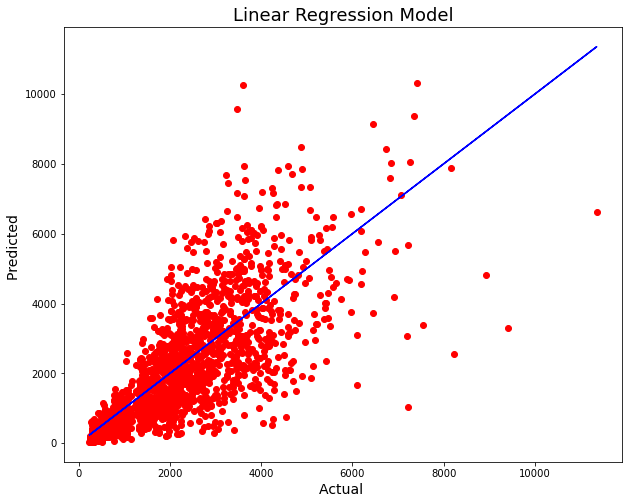

In [140]:
plt.figure(figsize=(10,8))
plt.scatter(x=pred_test,y=y_test,color='r')#tests

plt.plot(pred_test,pred_test,color='b')#pred_test
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression Model",fontsize=18)
plt.show()

## Saving Model

In [141]:
import pickle
filename='bigdatatrain.pkl'
pickle.dump(gbr,open(filename,'wb'))

In [142]:
loaded_model=pickle.load(open('bigdatatrain.pkl','rb'))

In [143]:
result=loaded_model.score(x_test,y_test)
print(result*100)

61.455164449068846


In [144]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Original'])

In [145]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704
Predicted,1981.908104,1679.759498,517.53419,1630.478223,1821.901533,2475.053353,2504.13448,2419.68176,1376.963564,189.149921,...,4989.820262,4192.673441,1292.781756,2774.988326,667.11770,1919.202454,3844.755003,1898.710928,1290.494473,189.149921
Original,2335.892720,1799.790560,646.42522,1675.618860,1855.251700,3749.985340,2728.38182,2875.25730,1536.400080,270.048480,...,6193.937400,4055.853860,1347.246300,2529.174460,671.92536,2020.436680,4282.292440,1876.956780,1699.188180,270.048480
